## EDA

In [1]:
# 데이터 분석
import numpy as np
import pandas as pd

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# 파일경로
from glob import glob

In [2]:
# 시각화 테마 설정
sns.set_style('dark')
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

In [3]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [4]:
# 색상 코드 지정
green_code = ['#228B22', '#64ae64']
blue_code = ['#688BB3', '#8AB9CE']

In [5]:
sns.set_palette('pastel')

In [6]:
file = glob('../recipes_after.csv')
file[0]

'../recipes_after.csv'

In [7]:
# 데이터 불러오기
df = pd.read_csv(file[0])
df.shape

(4298, 7)

In [8]:
# 데이터 요약 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4298 entries, 0 to 4297
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요리      4298 non-null   object
 1   종류      4298 non-null   object
 2   난이도     4298 non-null   int64 
 3   소요시간    4298 non-null   int64 
 4   링크      4298 non-null   object
 5   재료      4298 non-null   object
 6   재료수     4298 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 235.2+ KB


In [9]:
# 데이터 형태 확인
display(df.head(2), df.tail(2))

,요리,종류,난이도,소요시간,링크,재료,재료수
0,꼬시래기 물냉면,메인요리,1,20,https://wtable.co.kr/recipes/GdRMuEBF9nXVJAtqw...,꼬시래기 통깨 고춧가루 용냉면육수 오이 달걀 쌈무 고추장 소금 식초 매실청 참기름,12
1,닭죽,메인요리,1,30,https://wtable.co.kr/recipes/QawUyVgt3e5wvCT9d...,통깨 찹쌀밥 다진당근 물 소금 닭가슴살 통마늘 참기름,8


,요리,종류,난이도,소요시간,링크,재료,재료수
4296,고등어 강정,오븐요리,2,30,https://wtable.co.kr/recipes/KeZoBFZT8b2iHPzfv...,간장 파채 청주 물 소금 설탕 케첩 다진마늘 순살고등어 식용유 전분가루 통깨 땅콩 ...,19
4297,대파그라탕,오븐요리,1,30,https://wtable.co.kr/recipes/JyHPoLXkZ5m8Xu9rt...,대파 코코넛밀크 디종머스타드 후춧가루 소금 타임 뉴트리셔널이스트 두유 파슬리,9


In [10]:
# 기술 통계 확인
display(df.describe(), df.describe(include='O'))

,난이도,소요시간,재료수
count,4298.000000,4298.000000,4298.000000
mean,1.397627,35.128664,11.798046
std,0.534901,56.245902,4.589672
min,1.000000,0.000000,1.000000
25%,1.000000,20.000000,8.000000
50%,1.000000,30.000000,11.000000
75%,2.000000,40.000000,15.000000
max,3.000000,2200.000000,29.000000


,요리,종류,링크,재료
count,4298,4298,4298,4298
unique,2014,18,2069,2057
top,두부가츠샌드위치,메인요리,https://wtable.co.kr/recipes/ys56AHsWvZpDXNutu...,통깨 배추김치 간장 맛술 식용유 애호박 올리고당 쇠고기 후춧가루 소금 밥 참기름 당근
freq,6,912,6,6


In [11]:
# 결측치 확인
df.isnull().sum()

요리      0
종류      0
난이도     0
소요시간    0
링크      0
재료      0
재료수     0
dtype: int64

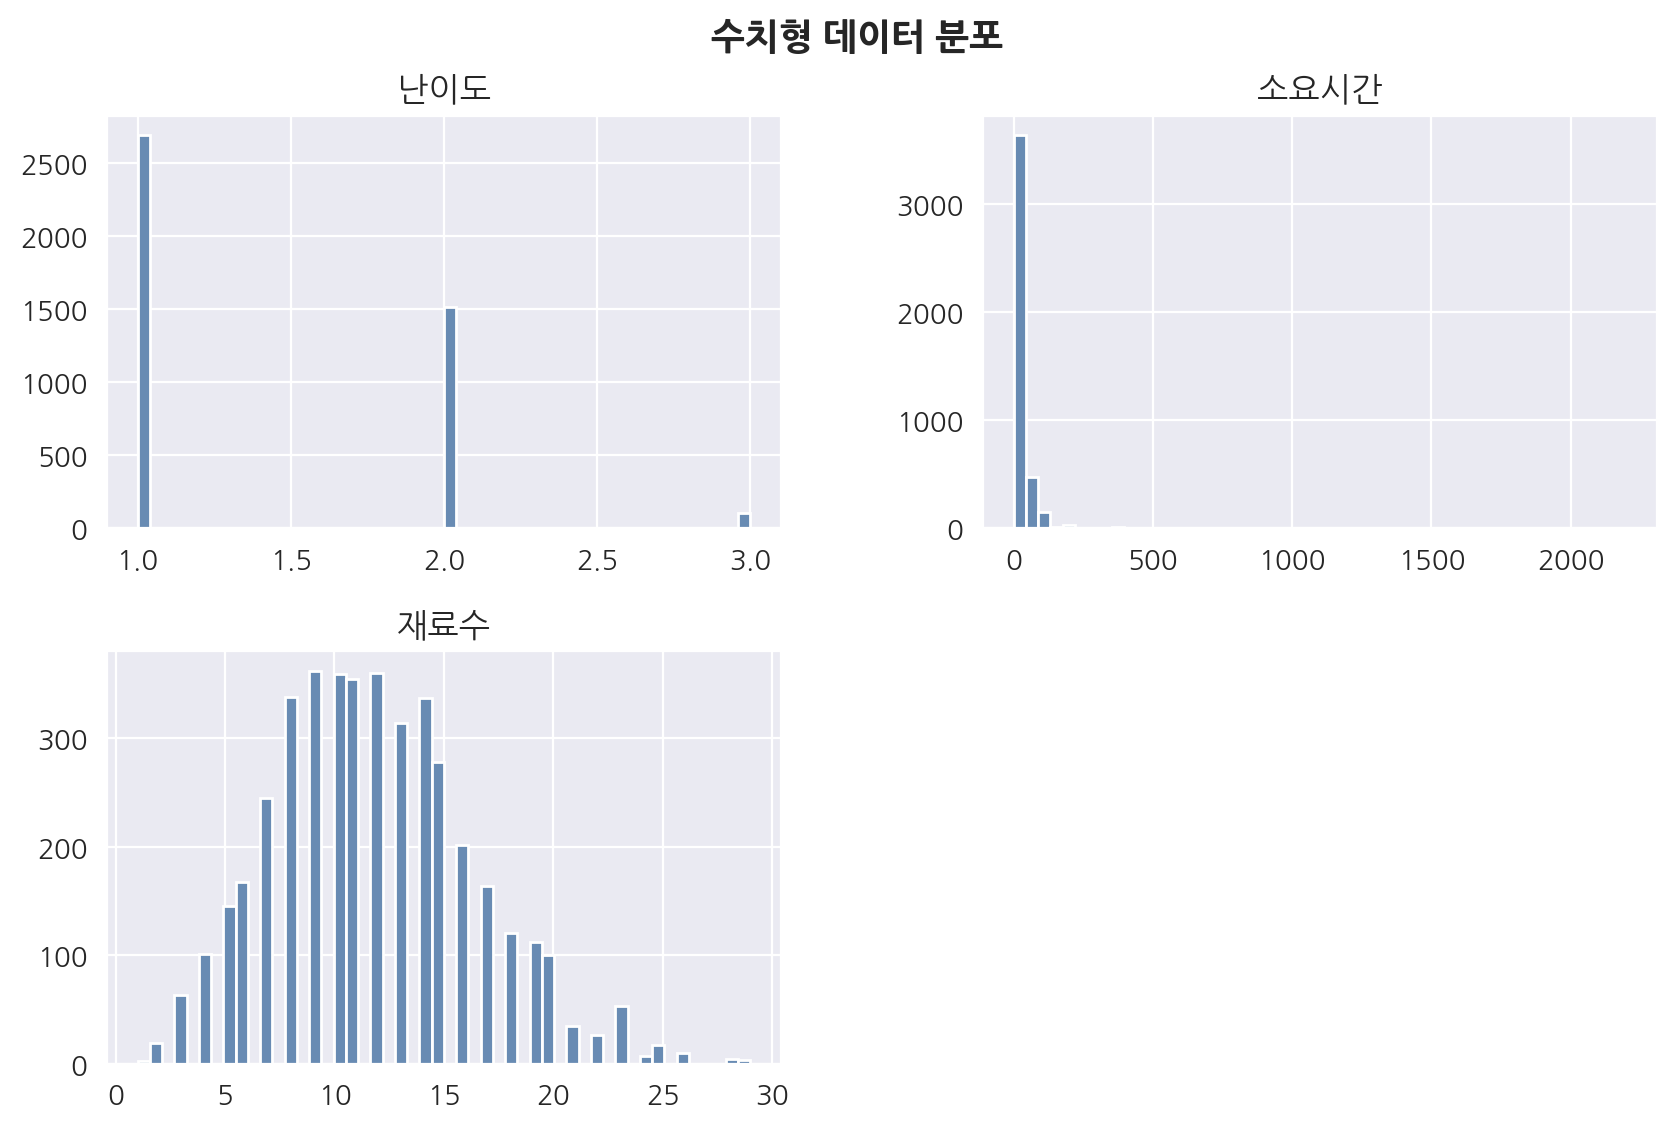

In [12]:
# 수치형 데이터 히스토그램
df.hist(bins=50, figsize=(10, 6), color=blue_code[0]);
plt.suptitle('수치형 데이터 분포', fontsize=13, fontweight='bold')
plt.subplots_adjust(top=0.9)
plt.show()

In [13]:
# 레시피 이름의 빈도수 확인
# 중복되는 레시피가 여럿 있음을 알 수 있음
df['요리'].value_counts()

두부가츠샌드위치      6
낫또 아보카도 덮밥    6
과카몰리          6
스키야키          6
감태명란주먹밥       5
             ..
조염 옥수수        1
바나나 튀김        1
단호박 코코넛 지짐    1
타피오카 수정교자     1
고등어 강정        1
Name: 요리, Length: 2014, dtype: int64

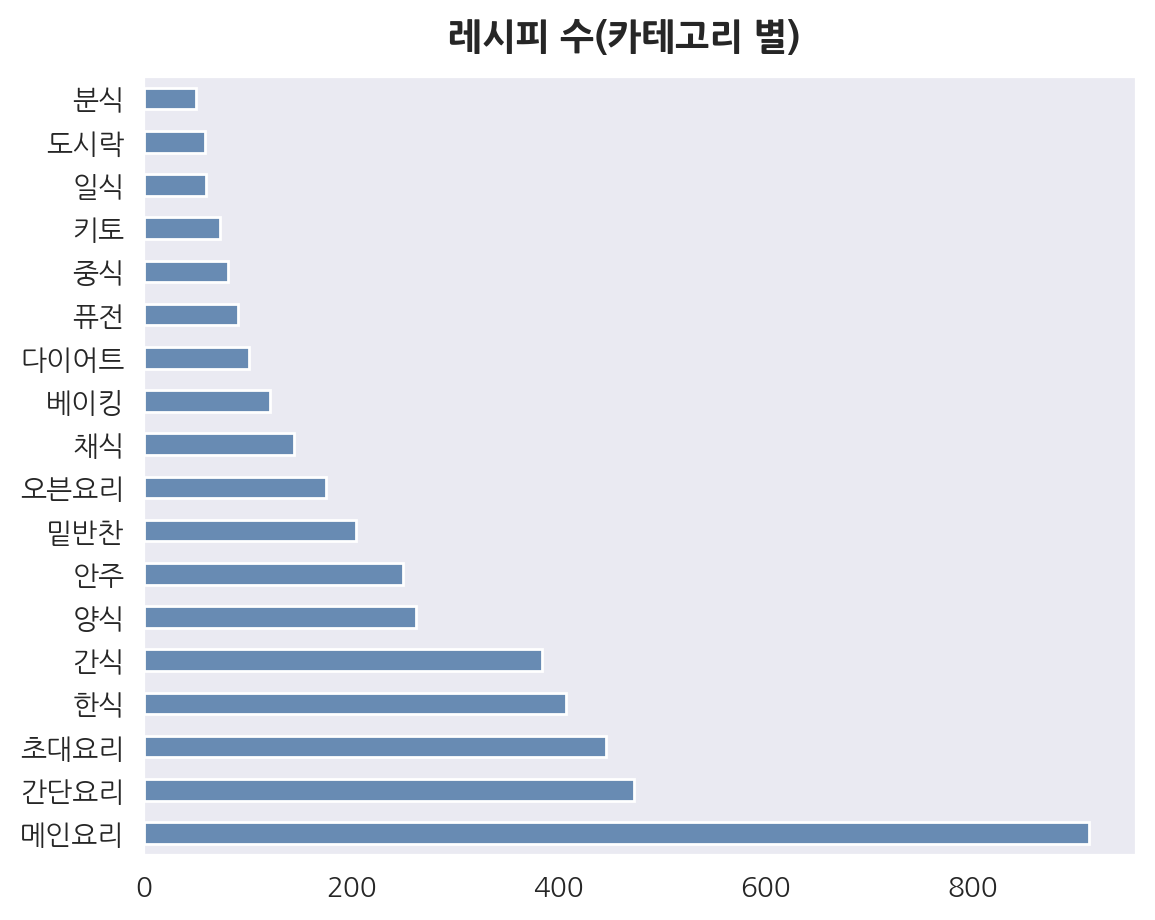

In [14]:
# 카테고리별 레시피 수 확인
df['종류'].value_counts().plot.barh(color=blue_code[0]);
plt.suptitle('레시피 수(카테고리 별)', fontsize=13, fontweight='bold')
plt.subplots_adjust(top=0.92)
plt.show()

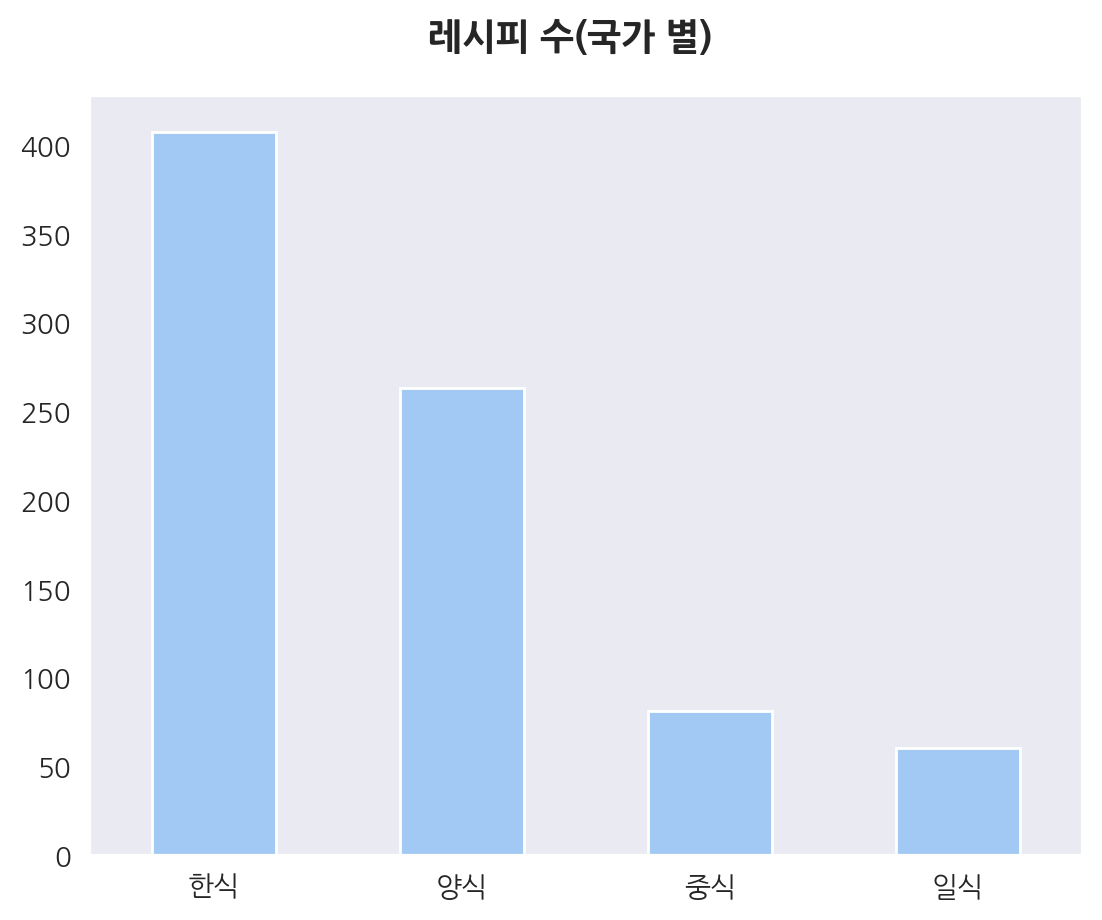

In [15]:
# 한식 중식 양식 일식만 보기
country = ['한식', '중식', '양식', '일식']
df.loc[df['종류'].isin(country)]['종류'].value_counts().plot.bar(rot=0);
plt.suptitle('레시피 수(국가 별)', fontsize=13, fontweight='bold')
plt.subplots_adjust(top=0.9)
plt.show()

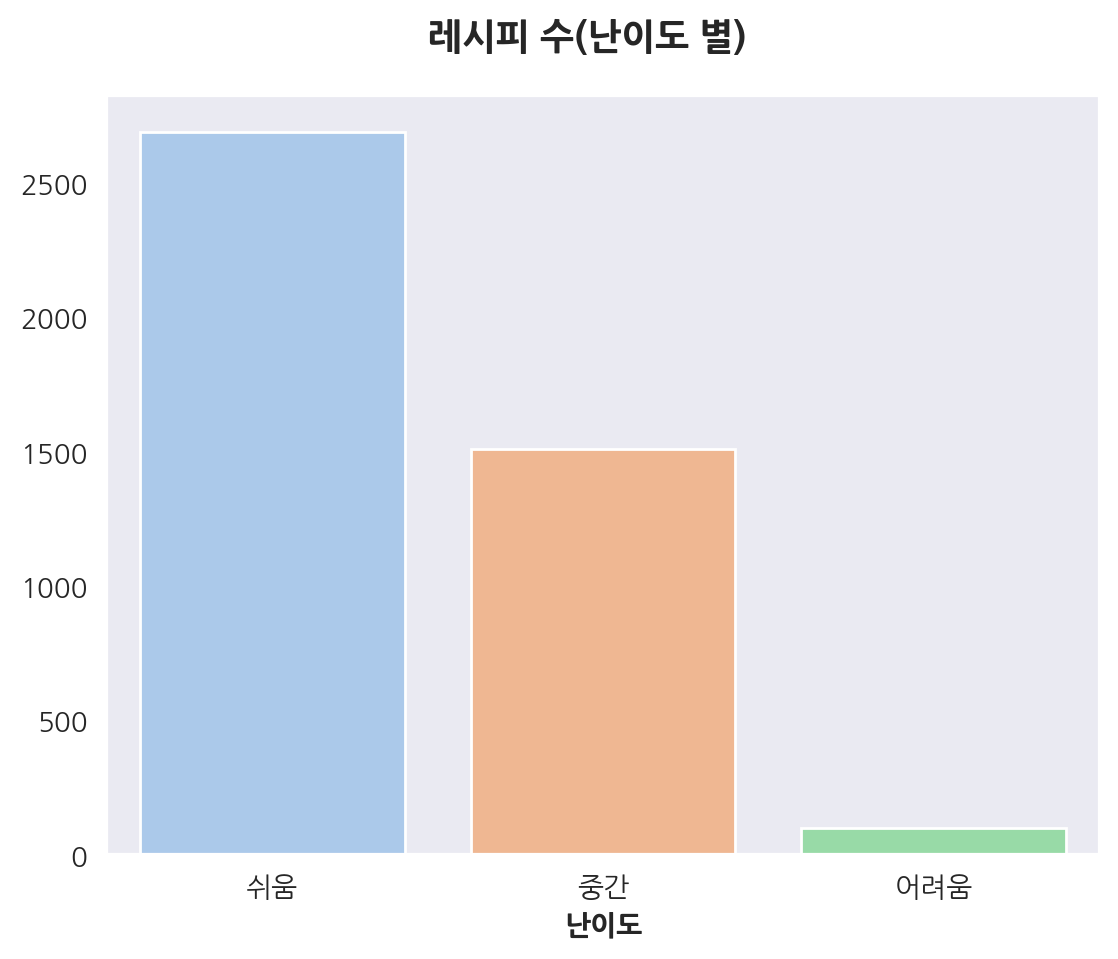

In [16]:
# 난이도별 레시피 분포 확인
# 난이도가 비교적 쉬운 레시피의 수가 많은 것을 알 수 있음
sns.countplot(data=df, x='난이도');
plt.suptitle('레시피 수(난이도 별)', fontsize=13, fontweight='bold')
plt.xlabel('난이도', fontweight='bold')
plt.ylabel('')
plt.xticks(ticks=[0, 1, 2], labels=['쉬움', '중간', '어려움'])
plt.subplots_adjust(top=0.9)
plt.show()

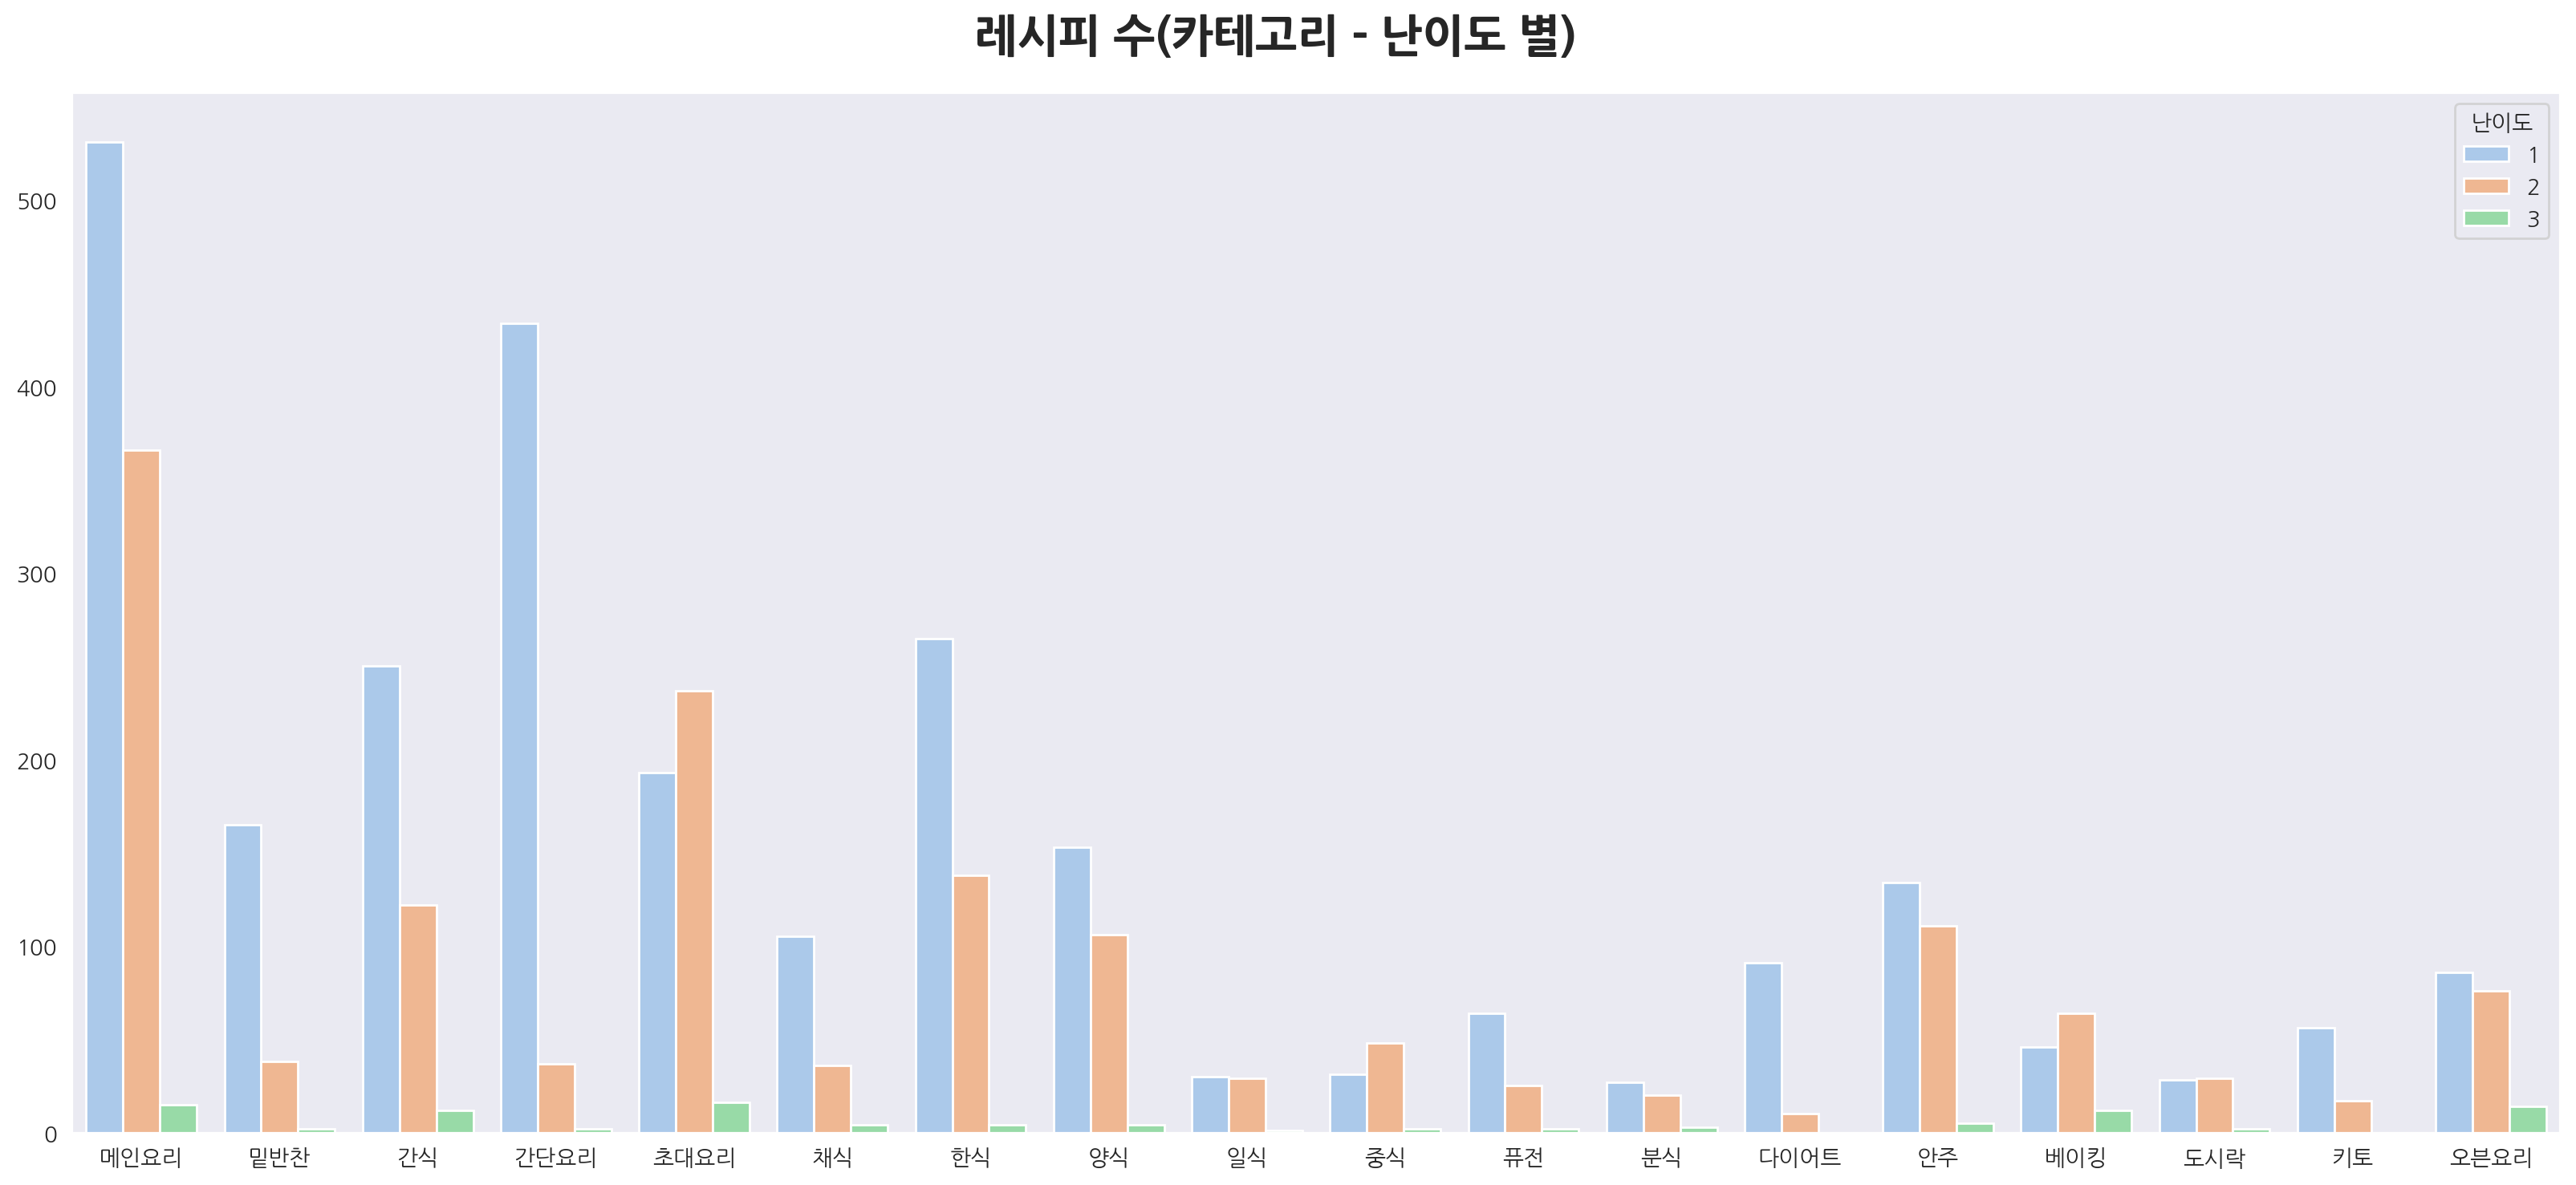

In [17]:
# 카테고리 별 난이도의 분포 확인
plt.figure(figsize=(20,8))
sns.countplot(data=df, x='종류', hue='난이도');
plt.suptitle('레시피 수(카테고리 - 난이도 별)', fontsize=20, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.subplots_adjust(top=0.92)
plt.show()

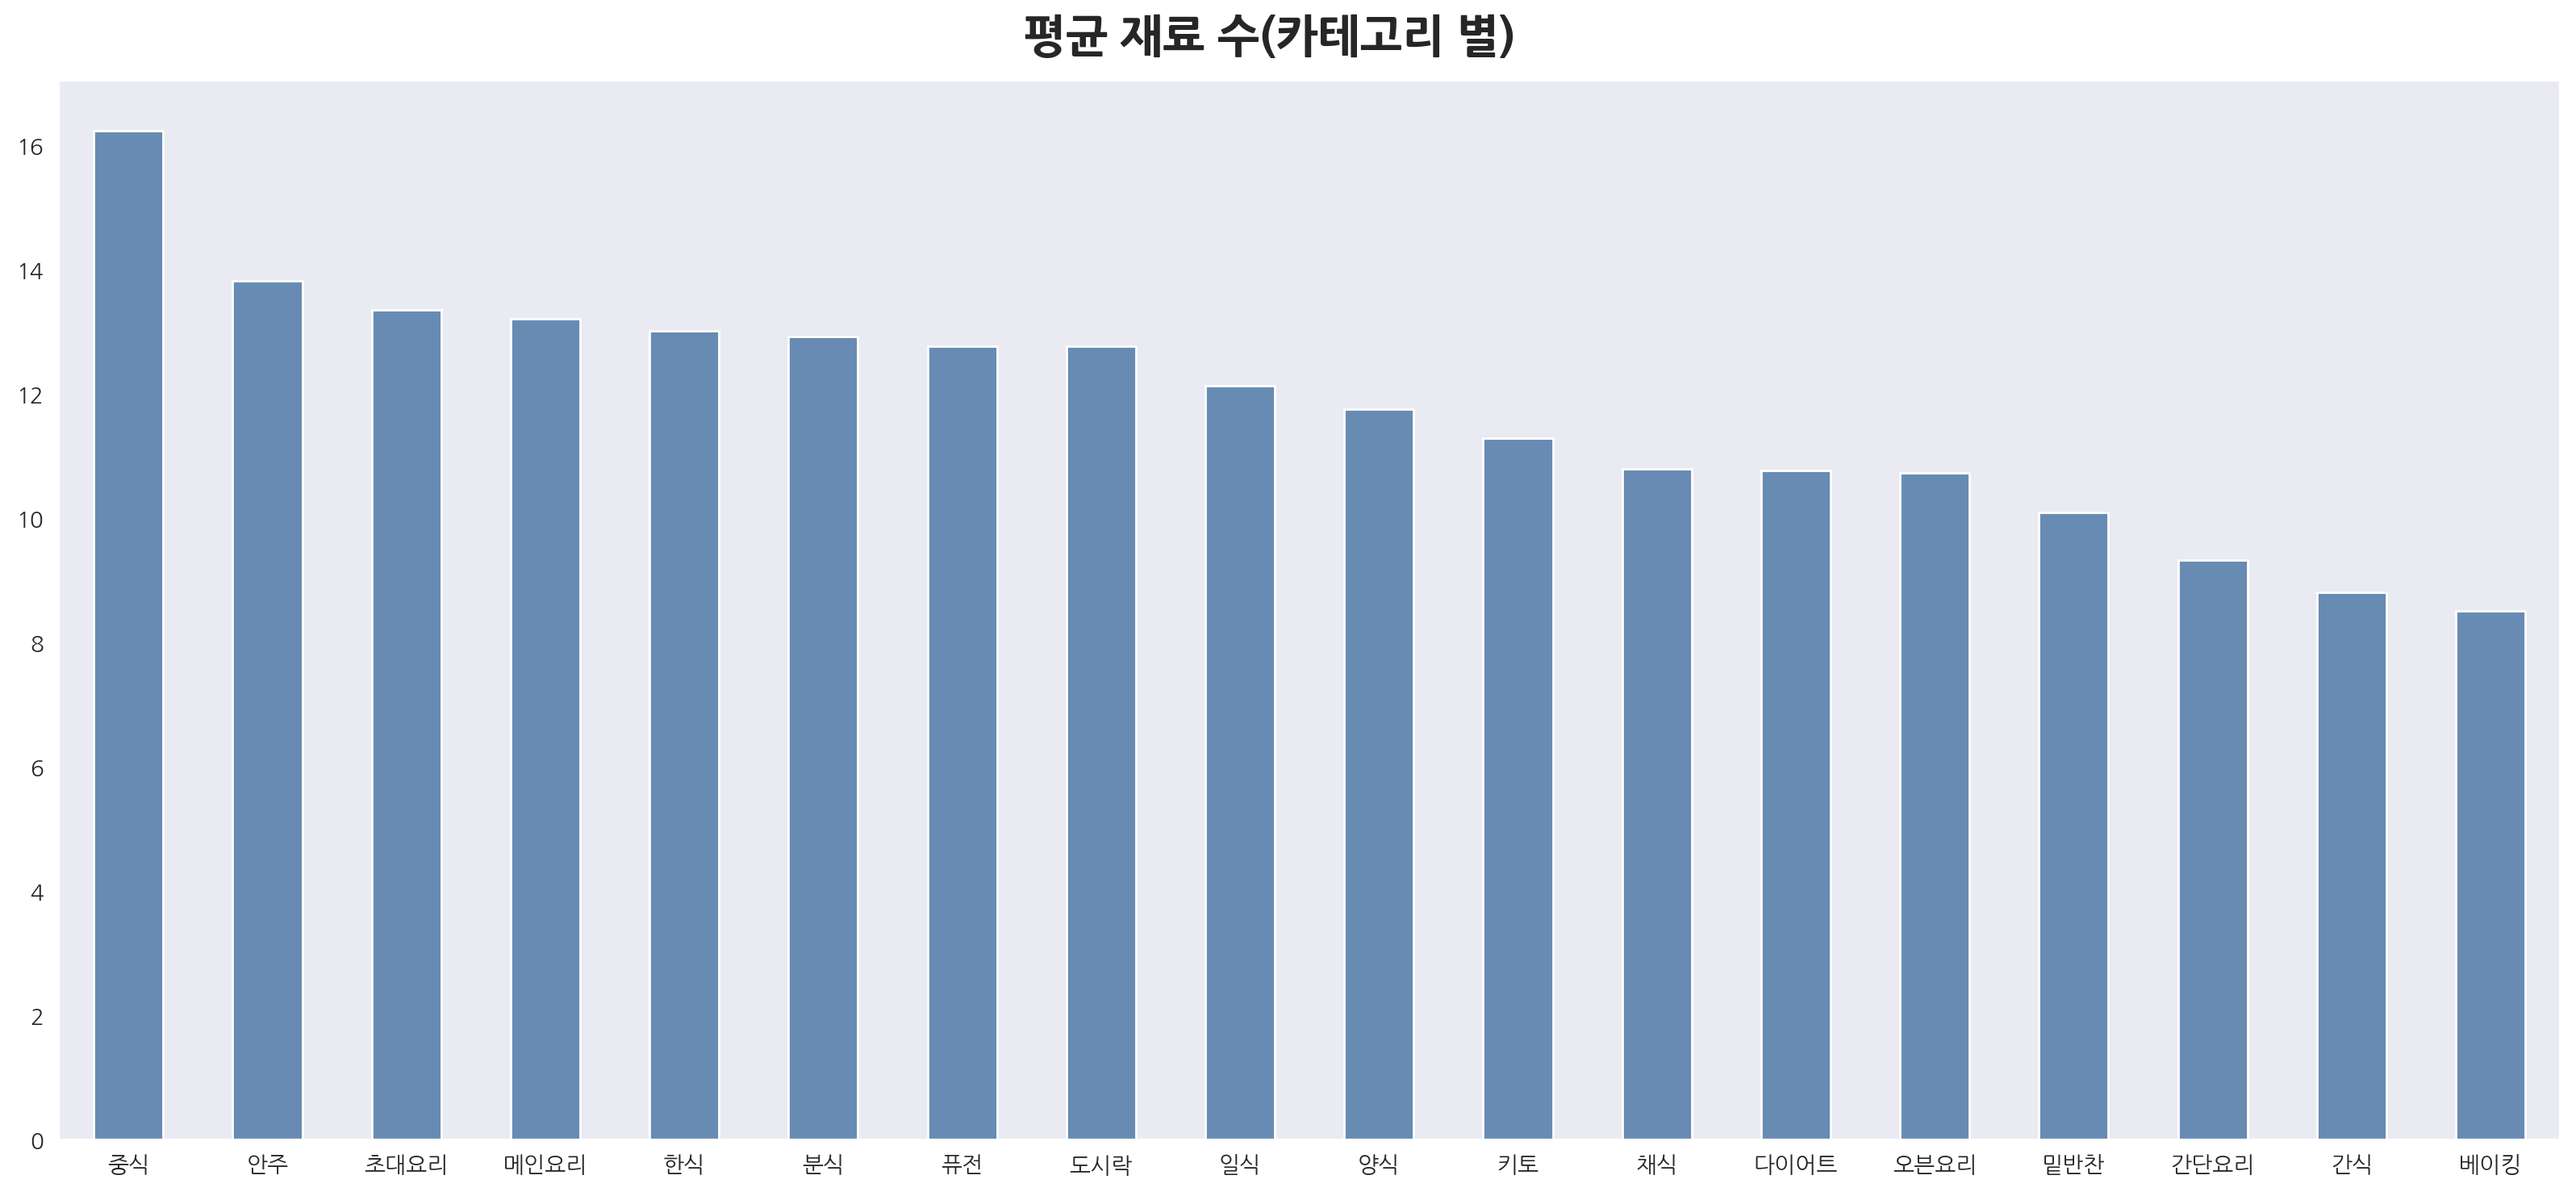

In [18]:
# 카테고리별 평균 재료수
plt.figure(figsize=(20,8))
df.groupby('종류')['재료수'].mean().sort_values(ascending=False).plot.bar(rot=0, color=blue_code[0]);
plt.suptitle('평균 재료 수(카테고리 별)', fontsize=20, fontweight='bold')
plt.xlabel('')
plt.subplots_adjust(top=0.93)
plt.show()

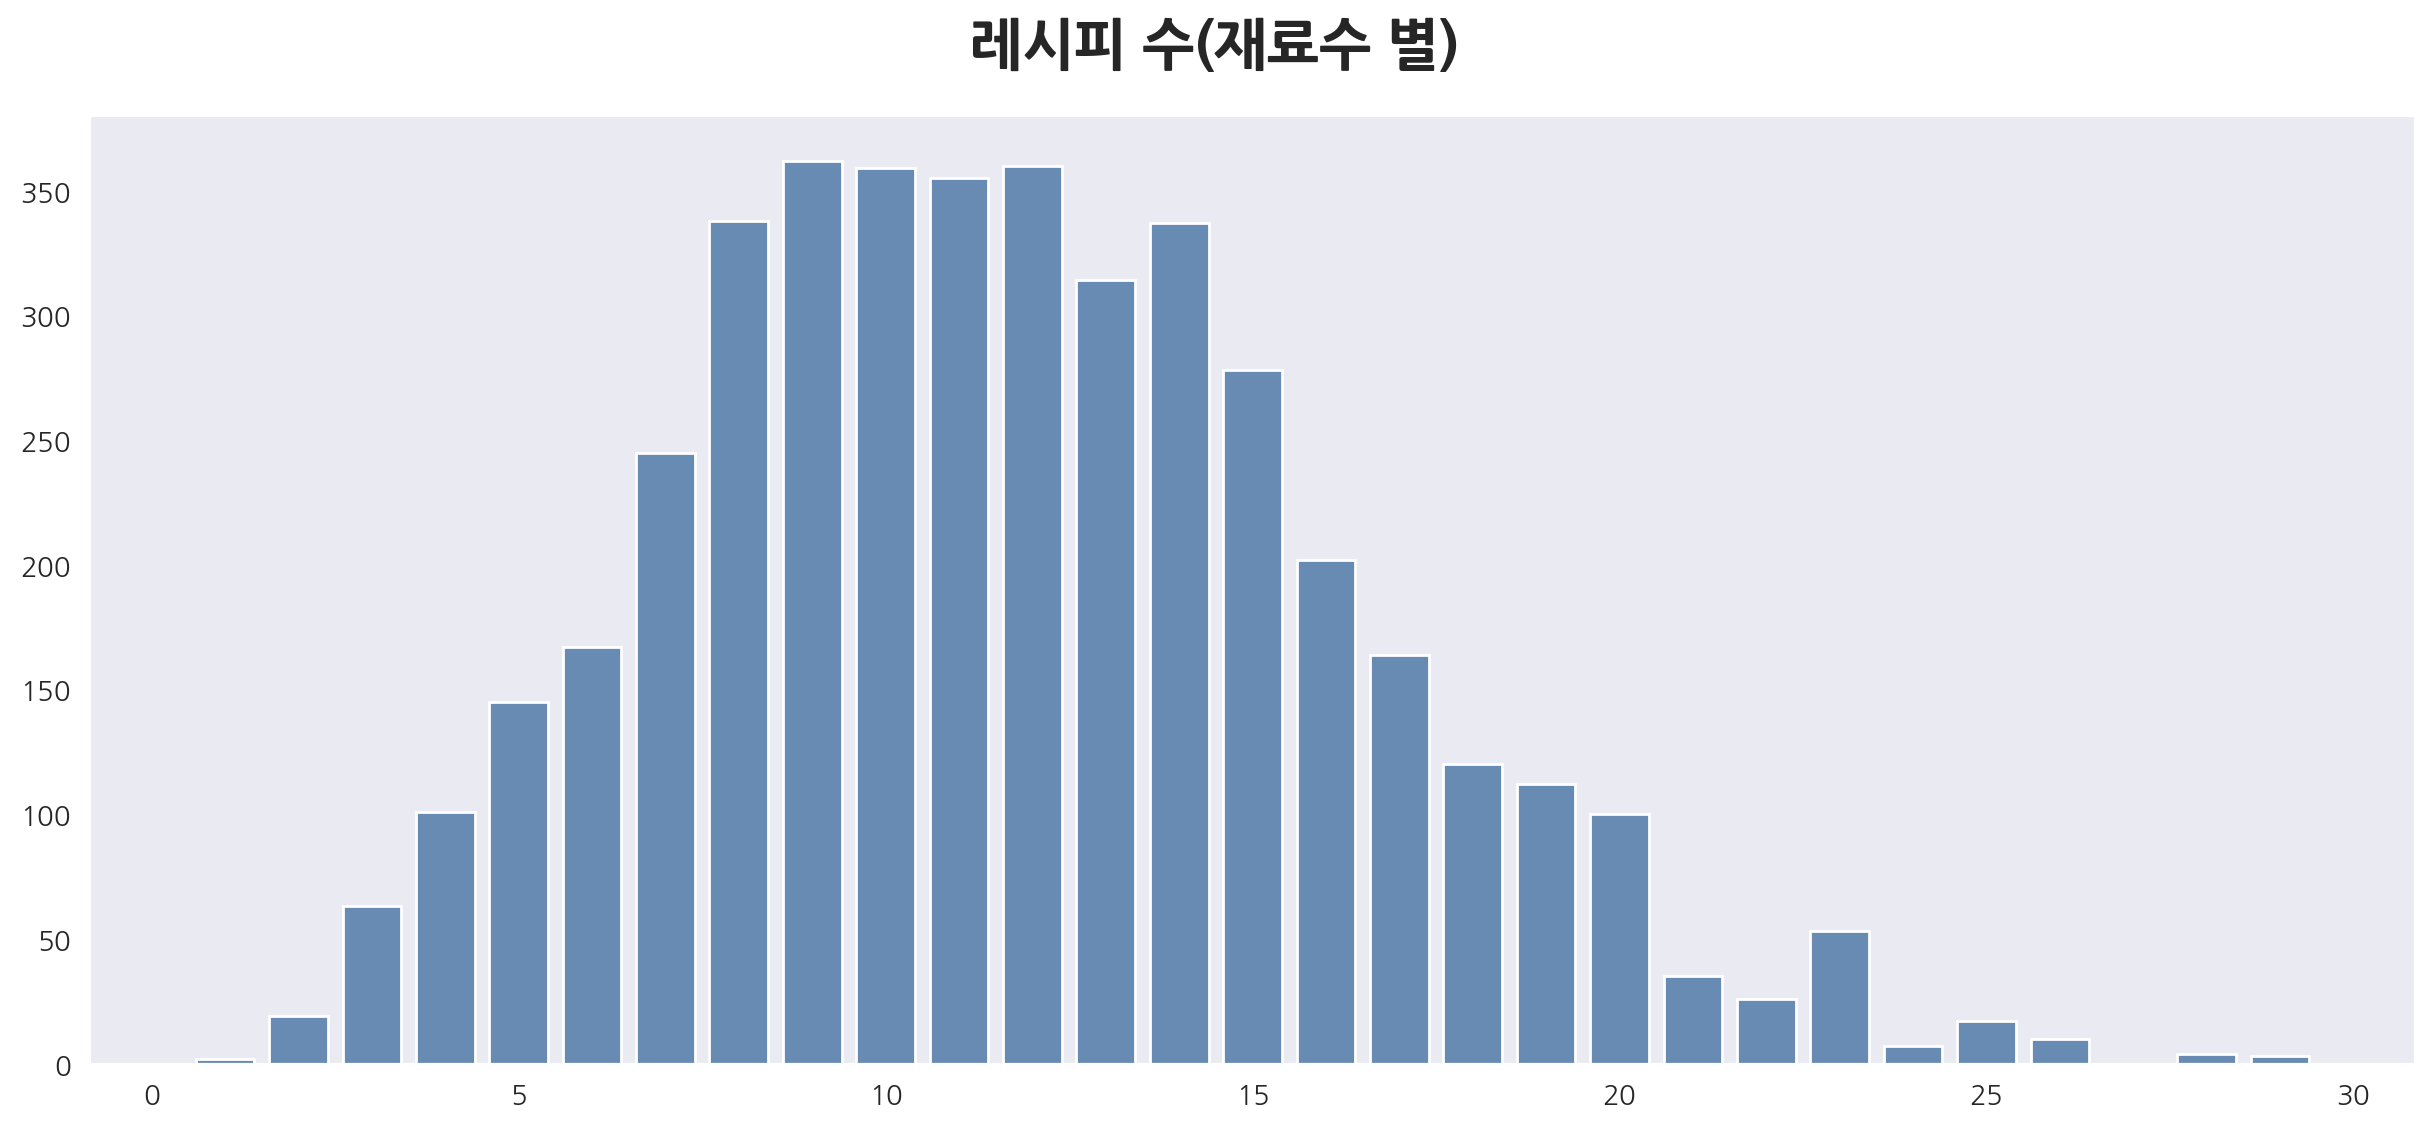

In [19]:
# 전체 레시피의 필요 재료수
ing_counts = df['재료수'].value_counts()
plt.figure(figsize=(15,6))
plt.bar(ing_counts.index, ing_counts.values, color=blue_code[0])
plt.suptitle('레시피 수(재료수 별)', fontsize=20, fontweight='bold')
plt.subplots_adjust(top=0.9)

plt.show() 